In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:

df = pd.read_csv('patient_heart_rate.csv',header=0,delimiter=',',encoding='utf-8')
df.head(10)

,Id,Name,Age,Weight,m0006,m0612,m1218,f0006,f0612,f1218
0,1.0,Mickéy Mousé,56.0,70kgs,72,69,71,-,-,-
1,2.0,Donald Duck,34.0,154.89lbs,-,-,-,85,84,76
2,3.0,Mini Mouse,16.0,NaN,-,-,-,65,69,72
3,4.0,Scrooge McDuck,NaN,78kgs,78,79,72,-,-,-
4,5.0,Pink Panther,54.0,198.658lbs,-,-,-,69,NaN,75
5,6.0,Huey McDuck,52.0,189lbs,-,-,-,68,75,72
6,7.0,Dewey McDuck,19.0,56kgs,-,-,-,71,78,75
7,8.0,Scööpy Doo,32.0,78kgs,78,76,75,-,-,-
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df [['Firstname', 'Lastname']] = df ['Name'].str.split(expand=True) 
df = df.drop('Name',axis=1)
df.head(5)

,Id,Age,Weight,m0006,m0612,m1218,f0006,f0612,f1218,Firstname,Lastname
0,1.0,56.0,70kgs,72,69,71,-,-,-,Mickéy,Mousé
1,2.0,34.0,154.89lbs,-,-,-,85,84,76,Donald,Duck
2,3.0,16.0,NaN,-,-,-,65,69,72,Mini,Mouse
3,4.0,NaN,78kgs,78,79,72,-,-,-,Scrooge,McDuck
4,5.0,54.0,198.658lbs,-,-,-,69,NaN,75,Pink,Panther


In [5]:
weight = df['Weight']
for i in range( 0 , len(weight)):
    x = str(weight[i])
    if 'lbs' in x[-3:]:
        x = x[:-3]
        float_x= float (x)
        y = int (float_x/2.2)
        weight[i] = y
    if 'kgs' in x[-3:]:
        x = x[:-3:]
        float_x= float (x)
        weight[i] = x

C:\Users\ASUS\AppData\Local\Temp\ipykernel_21160\132806510.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weight[i] = x
C:\Users\ASUS\AppData\Local\Temp\ipykernel_21160\132806510.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weight[i] = y
C:\Users\ASUS\AppData\Local\Temp\ipykernel_21160\132806510.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weight[i] = x
C:\Users\ASUS\AppData\Local\Temp\ipykernel_21160\132806510.py:

In [6]:
df.rename(columns={'Weight':'Weight_kgs'},inplace=True)
df.head(5)

,Id,Age,Weight_kgs,m0006,m0612,m1218,f0006,f0612,f1218,Firstname,Lastname
0,1.0,56.0,70,72,69,71,-,-,-,Mickéy,Mousé
1,2.0,34.0,70,-,-,-,85,84,76,Donald,Duck
2,3.0,16.0,NaN,-,-,-,65,69,72,Mini,Mouse
3,4.0,NaN,78,78,79,72,-,-,-,Scrooge,McDuck
4,5.0,54.0,90,-,-,-,69,NaN,75,Pink,Panther


In [7]:
df.dropna(how='all', inplace=True)

In [8]:
df = df.drop_duplicates(subset=['Firstname', 'Lastname', 'Age', 'Weight_kgs'])

In [9]:
df.Firstname.replace({r'[^\x00-\x7F]+':''}, regex=True, inplace=True)
df.Lastname.replace({r'[^\x00-\x7F]+':''}, regex=True, inplace=True)
print(df)

      Id   Age Weight_kgs m0006 m0612 m1218 f0006 f0612 f1218 Firstname  \
0    1.0  56.0         70    72    69    71     -     -     -     Micky   
1    2.0  34.0         70     -     -     -    85    84    76    Donald   
2    3.0  16.0        NaN     -     -     -    65    69    72      Mini   
3    4.0   NaN         78    78    79    72     -     -     -   Scrooge   
4    5.0  54.0         90     -     -     -    69   NaN    75      Pink   
5    6.0  52.0         85     -     -     -    68    75    72      Huey   
6    7.0  19.0         56     -     -     -    71    78    75     Dewey   
7    8.0  32.0         78    78    76    75     -     -     -      Scpy   
11  10.0  12.0         45     -     -     -    92    95    87     Louie   
12  11.0   NaN         60    78    75    72     -     -     -     Henry   
13  12.0  34.0        NaN    65    67    55     -     -     -    Michel   
14  13.0   NaN        NaN     -     -     -    68    72    70      Tana   
15  14.0   NaN        NaN

C:\Users\ASUS\AppData\Local\Temp\ipykernel_21160\3758458077.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Firstname.replace({r'[^\x00-\x7F]+':''}, regex=True, inplace=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_21160\3758458077.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves 

In [10]:
df['Age'].fillna(df['Age'].mode()[0], inplace=True)


C:\Users\ASUS\AppData\Local\Temp\ipykernel_21160\2527673359.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mode()[0], inplace=True)


In [11]:
df['Weight_kgs'].fillna(df['Weight_kgs'].median(), inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_21160\1979542691.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Weight_kgs'].fillna(df['Weight_kgs'].median(), inplace=True)


In [12]:
df = pd.melt (df, id_vars=['Id', 'Age', 'Weight_kgs', 'Firstname', 'Lastname'], value_name='PulseRate', var_name='gender_time').sort_values(['Id', 'Age', 'Weight_kgs', 'Firstname', 'Lastname'])
df.head(5)

,Id,Age,Weight_kgs,Firstname,Lastname,gender_time,PulseRate
0,1.0,56.0,70,Micky,Mous,m0006,72
14,1.0,56.0,70,Micky,Mous,m0612,69
28,1.0,56.0,70,Micky,Mous,m1218,71
42,1.0,56.0,70,Micky,Mous,f0006,-
56,1.0,56.0,70,Micky,Mous,f0612,-


In [13]:
df_temp = df['gender_time'].str.extract(r"(\D)(\d+)(\d{2})", expand=True)

# Hiển thị kết quả
print(df_temp)

    0   1   2
0   m  00  06
14  m  06  12
28  m  12  18
42  f  00  06
56  f  06  12
.. ..  ..  ..
27  m  06  12
41  m  12  18
55  f  00  06
69  f  06  12
83  f  12  18

[84 rows x 3 columns]


In [14]:
df_temp.columns = ['Gender', 'Lower_hour', 'Upper_hour']
df_temp

,Gender,Lower_hour,Upper_hour
0,m,00,06
14,m,06,12
28,m,12,18
42,f,00,06
56,f,06,12
...,...,...,...
27,m,06,12
41,m,12,18
55,f,00,06
69,f,06,12


In [15]:
df = pd.concat([df, df_temp], axis=1)
df

,Id,Age,Weight_kgs,Firstname,Lastname,gender_time,PulseRate,Gender,Lower_hour,Upper_hour
0,1.0,56.0,70,Micky,Mous,m0006,72,m,00,06
14,1.0,56.0,70,Micky,Mous,m0612,69,m,06,12
28,1.0,56.0,70,Micky,Mous,m1218,71,m,12,18
42,1.0,56.0,70,Micky,Mous,f0006,-,f,00,06
56,1.0,56.0,70,Micky,Mous,f0612,-,f,06,12
...,...,...,...,...,...,...,...,...,...,...
27,15.0,52.0,81,NaN,NaN,m0612,-,m,06,12
41,15.0,52.0,81,NaN,NaN,m1218,-,m,12,18
55,15.0,52.0,81,NaN,NaN,f0006,68,f,00,06
69,15.0,52.0,81,NaN,NaN,f0612,75,f,06,12


In [16]:
df = df.drop(['gender_time'], axis=1)
df

,Id,Age,Weight_kgs,Firstname,Lastname,PulseRate,Gender,Lower_hour,Upper_hour
0,1.0,56.0,70,Micky,Mous,72,m,00,06
14,1.0,56.0,70,Micky,Mous,69,m,06,12
28,1.0,56.0,70,Micky,Mous,71,m,12,18
42,1.0,56.0,70,Micky,Mous,-,f,00,06
56,1.0,56.0,70,Micky,Mous,-,f,06,12
...,...,...,...,...,...,...,...,...,...
27,15.0,52.0,81,NaN,NaN,-,m,06,12
41,15.0,52.0,81,NaN,NaN,-,m,12,18
55,15.0,52.0,81,NaN,NaN,68,f,00,06
69,15.0,52.0,81,NaN,NaN,75,f,06,12


In [17]:
df = df.replace('-', np.nan).dropna(subset=['PulseRate'])
df.head(10)

,Id,Age,Weight_kgs,Firstname,Lastname,PulseRate,Gender,Lower_hour,Upper_hour
0,1.0,56.0,70,Micky,Mous,72,m,00,06
14,1.0,56.0,70,Micky,Mous,69,m,06,12
28,1.0,56.0,70,Micky,Mous,71,m,12,18
43,2.0,34.0,70,Donald,Duck,85,f,00,06
57,2.0,34.0,70,Donald,Duck,84,f,06,12
71,2.0,34.0,70,Donald,Duck,76,f,12,18
44,3.0,16.0,74.0,Mini,Mouse,65,f,00,06
58,3.0,16.0,74.0,Mini,Mouse,69,f,06,12
72,3.0,16.0,74.0,Mini,Mouse,72,f,12,18
3,4.0,34.0,78,Scrooge,McDuck,78,m,00,06


In [18]:
df['Firstname'].isnull().sum()

np.int64(3)

In [19]:
df['Lastname'].isnull().sum()

np.int64(3)

In [20]:
df['Firstname'].fillna('Unknown', inplace=True)
df['Lastname'].fillna('Unknown', inplace=True)
df

C:\Users\ASUS\AppData\Local\Temp\ipykernel_21160\3005930594.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Firstname'].fillna('Unknown', inplace=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_21160\3005930594.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exampl

,Id,Age,Weight_kgs,Firstname,Lastname,PulseRate,Gender,Lower_hour,Upper_hour
0,1.0,56.0,70,Micky,Mous,72,m,00,06
14,1.0,56.0,70,Micky,Mous,69,m,06,12
28,1.0,56.0,70,Micky,Mous,71,m,12,18
43,2.0,34.0,70,Donald,Duck,85,f,00,06
57,2.0,34.0,70,Donald,Duck,84,f,06,12
71,2.0,34.0,70,Donald,Duck,76,f,12,18
44,3.0,16.0,74.0,Mini,Mouse,65,f,00,06
58,3.0,16.0,74.0,Mini,Mouse,69,f,06,12
72,3.0,16.0,74.0,Mini,Mouse,72,f,12,18
3,4.0,34.0,78,Scrooge,McDuck,78,m,00,06


In [21]:
df = df.reset_index()

In [22]:
df.to_csv('patient_heart_rate_clean.csv')

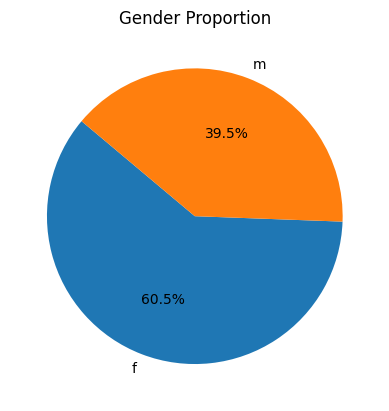

In [23]:
gender_counts = df['Gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Gender Proportion')
plt.show()

In [24]:
df

,index,Id,Age,Weight_kgs,Firstname,Lastname,PulseRate,Gender,Lower_hour,Upper_hour
0,0,1.0,56.0,70,Micky,Mous,72,m,00,06
1,14,1.0,56.0,70,Micky,Mous,69,m,06,12
2,28,1.0,56.0,70,Micky,Mous,71,m,12,18
3,43,2.0,34.0,70,Donald,Duck,85,f,00,06
4,57,2.0,34.0,70,Donald,Duck,84,f,06,12
5,71,2.0,34.0,70,Donald,Duck,76,f,12,18
6,44,3.0,16.0,74.0,Mini,Mouse,65,f,00,06
7,58,3.0,16.0,74.0,Mini,Mouse,69,f,06,12
8,72,3.0,16.0,74.0,Mini,Mouse,72,f,12,18
9,3,4.0,34.0,78,Scrooge,McDuck,78,m,00,06


In [25]:
#2. Tạo cột Fullname
df['Fullname'] = df['Firstname'] + ' ' + df['Lastname']

# Nhóm theo cột Fullname và thực hiện một phép tính tổng cộng trên các cột số (hoặc phép tính khác)
grouped_df = df.groupby('Fullname').sum()

# Hoặc nếu muốn nhóm mà không thực hiện phép tính, chỉ lấy các hàng đầu tiên cho mỗi nhóm:
grouped_df = df.groupby('Fullname').first()

# Hiển thị DataFrame đã nhóm
print(grouped_df)


                 index    Id   Age Weight_kgs Firstname Lastname PulseRate  \
Fullname                                                                     
Dewey McDuck        48   7.0  19.0         56     Dewey   McDuck        71   
Donald Duck         43   2.0  34.0         70    Donald     Duck        85   
Henry Nam            9  11.0  34.0         60     Henry      Nam        78   
Huey McDuck         47   6.0  52.0         85      Huey   McDuck        68   
Louie McDuck        50  10.0  12.0         45     Louie   McDuck        92   
Michel Long         10  12.0  34.0       74.0    Michel     Long        65   
Micky Mous           0   1.0  56.0         70     Micky     Mous        72   
Mini Mouse          44   3.0  16.0       74.0      Mini    Mouse        65   
Pink Panther        46   5.0  54.0         90      Pink  Panther        69   
Scpy Doo             7   8.0  32.0         78      Scpy      Doo        78   
Scrooge McDuck       3   4.0  34.0         78   Scrooge   McDuck

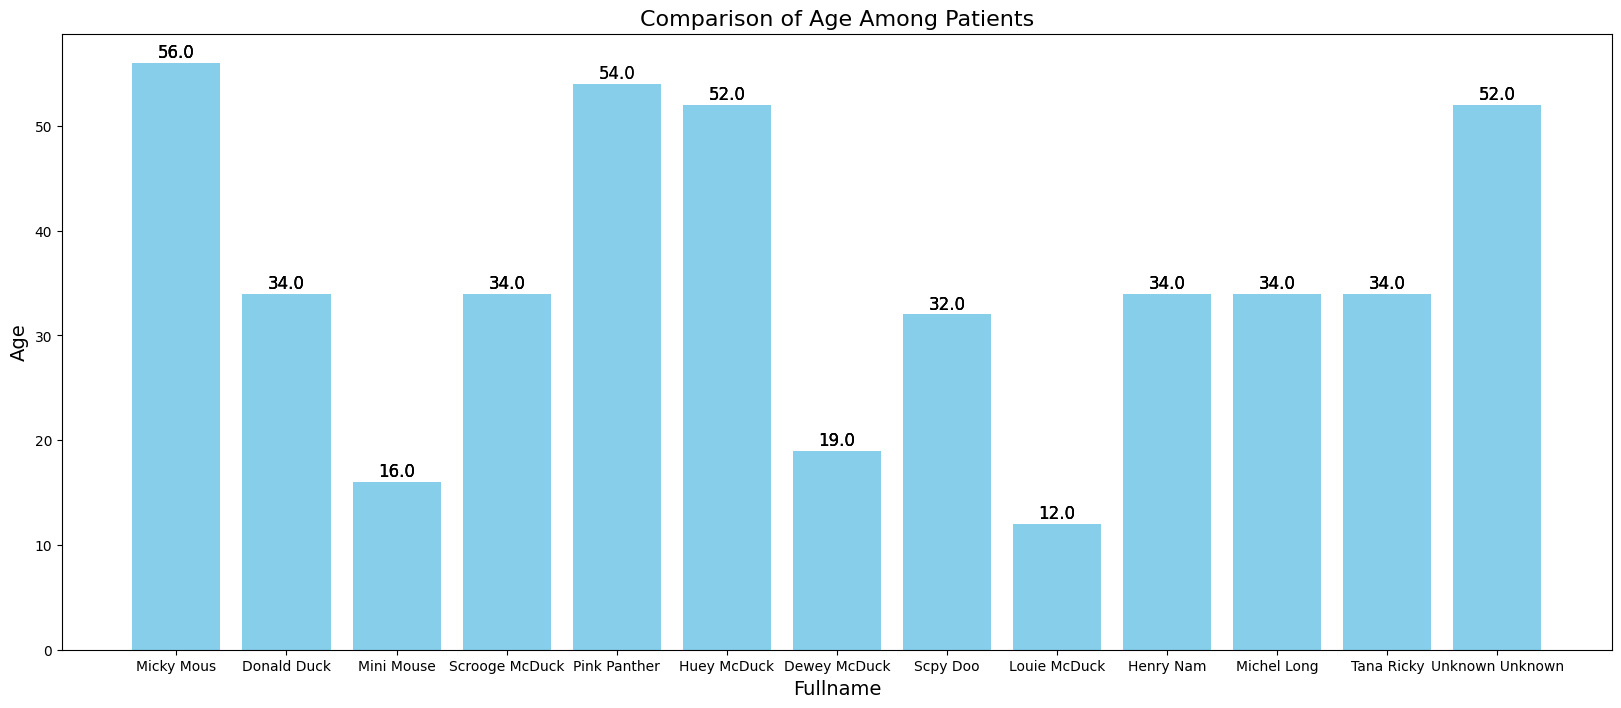

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))
bars = plt.bar(df['Fullname'], df['Age'], color='skyblue')

# Thêm tiêu đề và nhãn trục
plt.title('Comparison of Age Among Patients', fontsize=16)
plt.xlabel('Fullname', fontsize=14)
plt.ylabel('Age', fontsize=14)

# Hiển thị số tuổi trên đầu mỗi cột
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, str(yval), ha='center', fontsize=12)

# Hiển thị biểu đồ
plt.show()


In [159]:
df


,index,Id,Age,Weight_kgs,Firstname,Lastname,PulseRate,Gender,Lower_hour,Upper_hour,Fullname
0,0,1.0,56.0,70,Micky,Mous,72,m,00,06,Micky Mous
1,14,1.0,56.0,70,Micky,Mous,69,m,06,12,Micky Mous
2,28,1.0,56.0,70,Micky,Mous,71,m,12,18,Micky Mous
3,43,2.0,34.0,70,Donald,Duck,85,f,00,06,Donald Duck
4,57,2.0,34.0,70,Donald,Duck,84,f,06,12,Donald Duck
5,71,2.0,34.0,70,Donald,Duck,76,f,12,18,Donald Duck
6,44,3.0,16.0,74.0,Mini,Mouse,65,f,00,06,Mini Mouse
7,58,3.0,16.0,74.0,Mini,Mouse,69,f,06,12,Mini Mouse
8,72,3.0,16.0,74.0,Mini,Mouse,72,f,12,18,Mini Mouse
9,3,4.0,34.0,78,Scrooge,McDuck,78,m,00,06,Scrooge McDuck


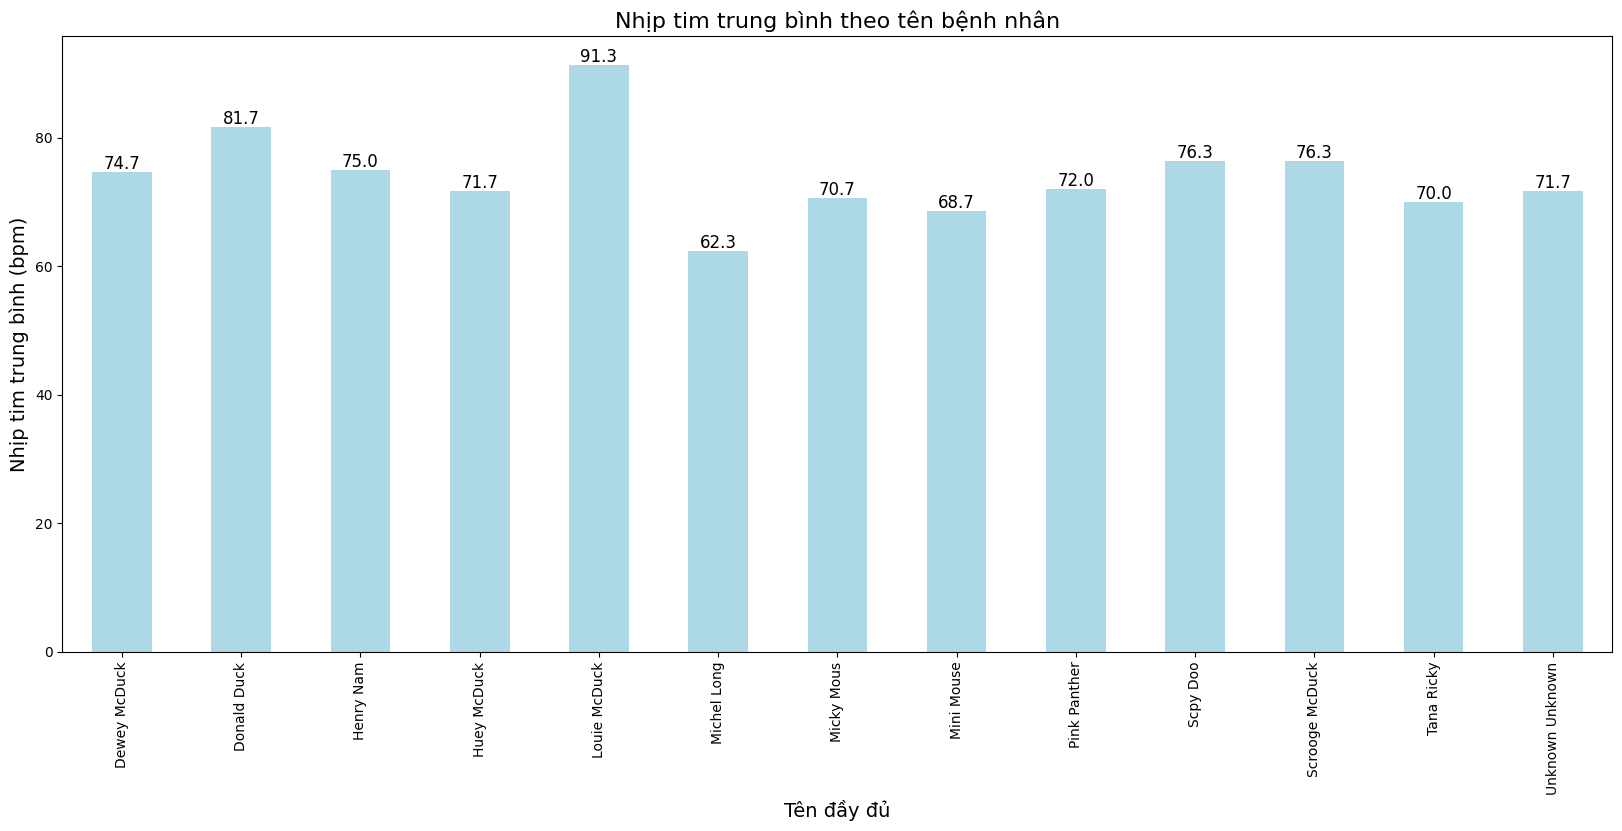

In [164]:
plt.figure(figsize=(20, 8))
# Chuyển đổi cột 'PulseRate' sang kiểu số
df['PulseRate'] = pd.to_numeric(df['PulseRate'], errors='coerce')

# Tính nhịp tim trung bình theo tên bệnh nhân
average_pulse_rate = df.groupby('Fullname')['PulseRate'].mean()

# Vẽ biểu đồ cột
average_pulse_rate.plot(kind='bar', color='lightblue')

# Thêm tiêu đề và nhãn trục
plt.title('Nhịp tim trung bình theo tên bệnh nhân', fontsize=16)
plt.xlabel('Tên đầy đủ', fontsize=14)
plt.ylabel('Nhịp tim trung bình (bpm)', fontsize=14)

# Hiển thị giá trị trên đầu mỗi cột
for i, v in enumerate(average_pulse_rate):
    plt.text(i, v + 0.5, f'{v:.1f}', ha='center', fontsize=12)

# Hiển thị biểu đồ
plt.show()

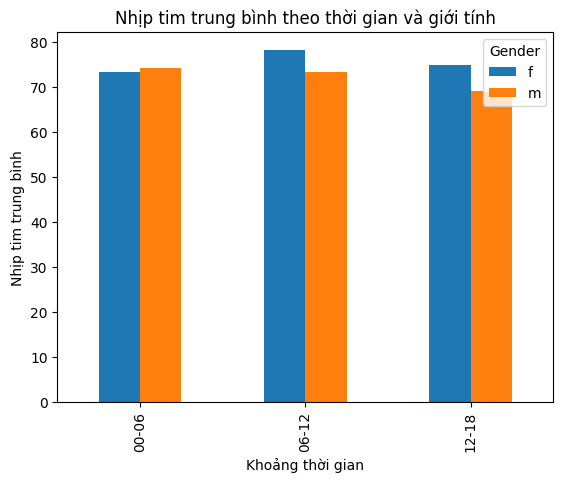

In [167]:
# Tạo cột Time_Slot để phân nhóm theo thời gian
df['Time_Slot'] = df['Lower_hour'].astype(str) + '-' + df['Upper_hour'].astype(str)

#5. Biểu đồ cột của nhịp tim trung bình theo thời gian và giới tính
df.groupby(['Time_Slot', 'Gender'])['PulseRate'].mean().unstack().plot(kind='bar')
plt.title('Nhịp tim trung bình theo thời gian và giới tính')
plt.xlabel('Khoảng thời gian')
plt.ylabel('Nhịp tim trung bình')
plt.show()

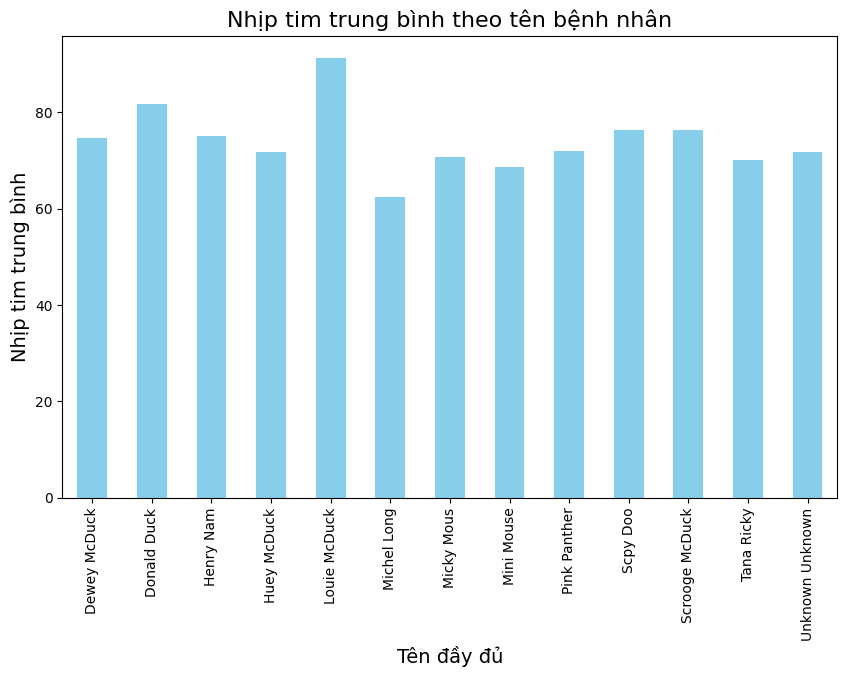

In [171]:
df['PulseRate'] = pd.to_numeric(df['PulseRate'], errors='coerce')
mean_pulse_rate = df.groupby('Fullname')['PulseRate'].mean()
# Vẽ biểu đồ cột
mean_pulse_rate.plot(kind='bar', color='skyblue', figsize=(10, 6))

# Thêm tiêu đề và nhãn trục
plt.title('Nhịp tim trung bình theo tên bệnh nhân', fontsize=16)
plt.xlabel('Tên đầy đủ', fontsize=14)
plt.ylabel('Nhịp tim trung bình', fontsize=14)

# Hiển thị biểu đồ
plt.show()


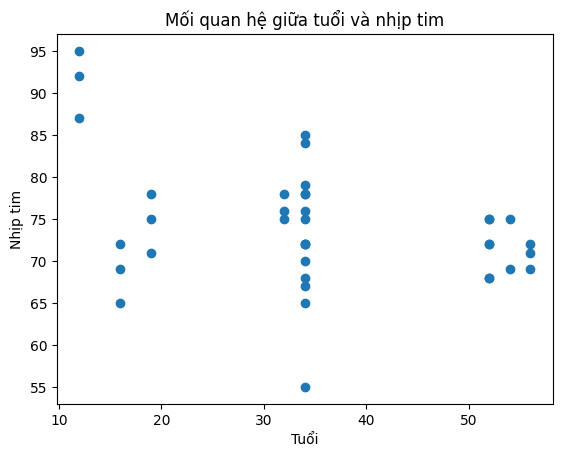

In [169]:
#6. Biểu đồ phân tán của tuổi và nhịp tim
plt.scatter(df['Age'], df['PulseRate'])
plt.title('Mối quan hệ giữa tuổi và nhịp tim')
plt.xlabel('Tuổi')
plt.ylabel('Nhịp tim')
plt.show()

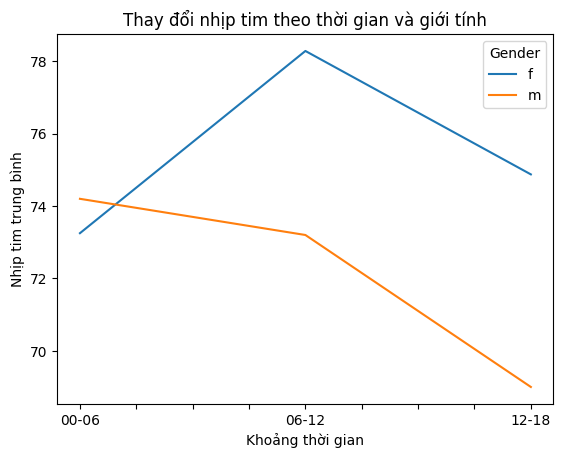

In [170]:
#7 Biểu đồ đường thể hiện thay đổi nhịp tim theo thời gian và giới tính
df.groupby(['Time_Slot', 'Gender'])['PulseRate'].mean().unstack().plot(kind='line')
plt.title('Thay đổi nhịp tim theo thời gian và giới tính')
plt.xlabel('Khoảng thời gian')
plt.ylabel('Nhịp tim trung bình')
plt.show()